# Notebook 1: Classifying Linearly Separated Data

#### STEP 1: Generate data and plot some hyperplanes
Sets of coordinates are drawn uniformly on the rectangle $[0,1]\times[0,1]$. The class with label $+1$ directly uses these coordinates whereas the $y$-coordinates of the class with label $-1$ are shifted vertically by the amount $-1.2$. The two separating hyperplanes are constructed manually.

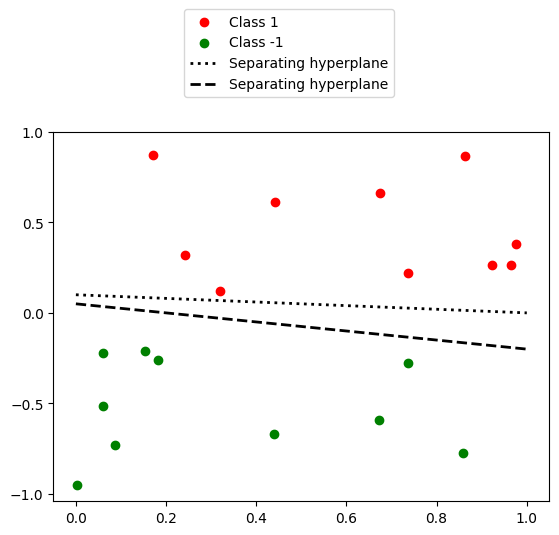

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of observations to plot
n = 20
class_size = int(n/2)

# Generate coordinates of points
rng = np.random.default_rng(1234)
coordinates_1 = rng.uniform(0, 1, size=(class_size, 2))
coordinates_2 = rng.uniform(0, 1, size=(class_size, 2))
coordinates_2[:, 1] -= 1.2

# Create labels
y_1 = np.full((class_size, 1), +1)
y_2 = np.full((class_size, 1), -1)

# Concatenate results
X = np.concatenate([coordinates_1, coordinates_2])
y = np.concatenate([y_1, y_2])

# Class indices
class_a = np.where(y == 1)
class_b = np.where(y == -1)

# Create plot
fig, ax = plt.subplots()
ax.scatter(X[:class_size, 0],X[:class_size, 1],c='r', label="Class 1")
ax.scatter(X[class_size:, 0],X[class_size:, 1],c='g', label="Class -1")
ax.plot([0, 1], [0.1, 0], 'k:', label='Separating hyperplane', linewidth=2)
ax.plot([0, 1], [0.05, -0.2], 'k--', label='Separating hyperplane', linewidth=2)
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.legend(bbox_to_anchor=(0.7, 1.35))

#### STEP 2: Solve the quadratic program to find maximum-margin hyperplane

*Note*: At the time of writing, the qpsolvers package does not include a solver. The solver needs to be installed seperatedly. The code belows relies on quadprog. It can be installed through $\texttt{pip3 install quadprog}$.

Slope: -0.12057463185113819
Intercept: -0.016334717718759845



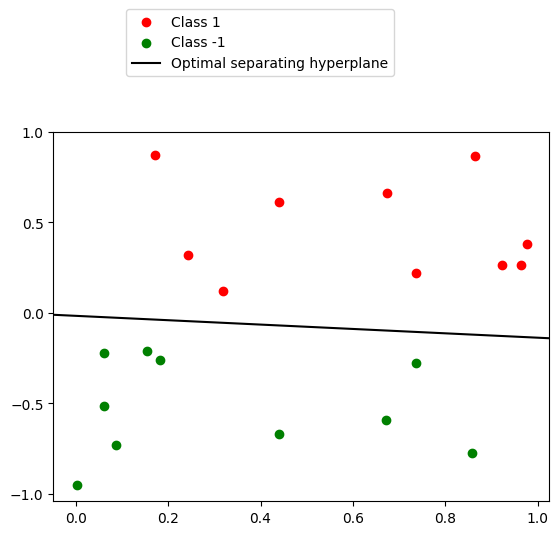

In [11]:
import numpy as np
from qpsolvers import solve_qp

# Dimension of the feature space
K = 2

# Vector of ones
ones = np.full((n, 1), 1)

# Auxiliary matrix
X_total = np.column_stack((X,ones))

# QP-specific quantities
P = np.block([
    [np.identity(K),    np.zeros((K, 1))],
    [np.ones((1, K)),   np.zeros((1,1))]])
q = np.zeros((3, 1))
G = -y*X_total
h = -ones

# Solve QP
x = solve_qp(P, q, G, h, solver="clarabel")

# Create plot
fig, ax = plt.subplots()
a = -x[0]/x[1]
b = -x[2]/x[1]

# Print slope and intercept of the separating hyperplane (= line in 2D)
print(f"Slope: {a}")
print(f"Intercept: {b}\n")


x_values = np.linspace(0 ,1, 51)
ax.scatter(X[:class_size, 0],X[:class_size, 1],c='r', label="Class 1")
ax.scatter(X[class_size:, 0],X[class_size:, 1],c='g', label="Class -1")
ax.axline((0,b), slope=a, color='k', linestyle='solid', label="Optimal separating hyperplane")
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.legend(bbox_to_anchor=(0.7, 1.35))

#### STEP 3 (OPTIONAL): Replicate slope and intercepts using function in $\texttt{utils.py}$

In [12]:
# Read configuration file
import json
import matplotlib.pyplot as plt
with open('../config/user_config_file.json') as f:
    config_file = json.load(f)

# Import helper functions from src/utils.py ()
import sys
sys.path.append(config_file["utils_location"])
from utils import *

try:
    f_slope, f_intercept = determine_separating_hyperplane(X[:,0], X[:,1], y)
except:
    print("Failed")

print(f"Slope: {f_slope}")
print(f"Intercept: {f_intercept}")

Slope: -0.12057463185113819
Intercept: -0.016334717718759845
